In [ ]:
import numpy as np                                #Required Libraries Added
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")  #File Included in Page

In [ ]:
df.head(3)  #Shows the first 3 rows of the data set

,province_name,neighborhood_name,neighborhood_village_uavt,very_heavily_damaged_building_number,number of_heavily_damaged_buildings,medium_damaged_building_number,light_damaged_building_number,life_loss_number,severe_injury_number,hospital_treatment_number,light_injury_number,natural gas_pipe_damage,drinking_water_pipe_damage,waste_water_pipe_damage,temporary_shelter
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398
1,ADALAR,HEYBELİADA,40142,101,175,423,393,25,21,66,113,1,1,2,763
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420


Text(0, 0.5, 'Number of Damaged Buildings')

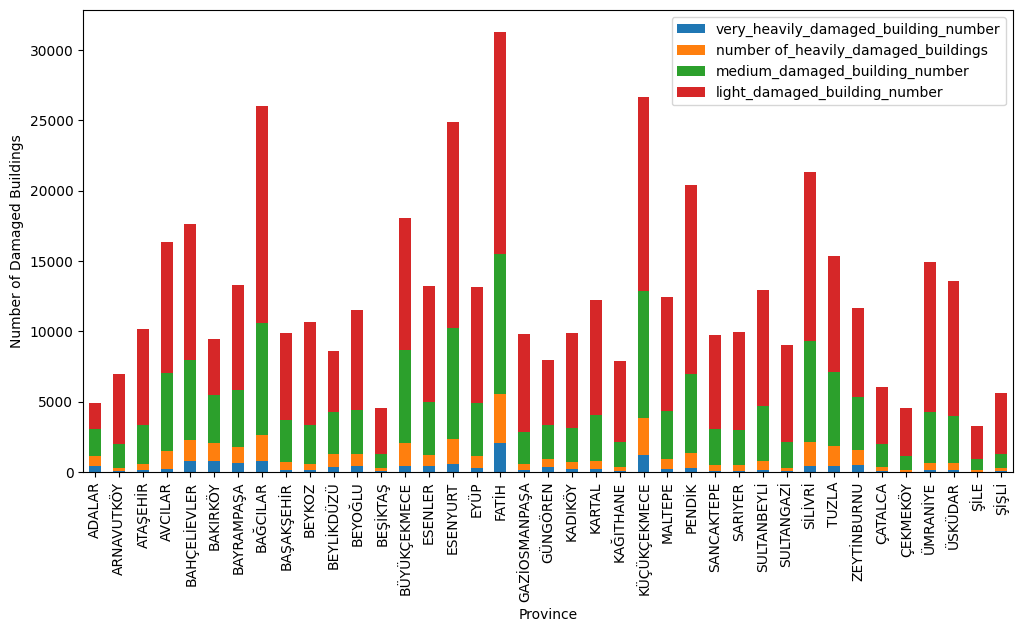

In [ ]:
# @title Distribution of Damaged Buildings by Province

import matplotlib.pyplot as plt

df_grouped = df.groupby('province_name')[['very_heavily_damaged_building_number', 'number of_heavily_damaged_buildings', 'medium_damaged_building_number', 'light_damaged_building_number']].sum()

df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Province')
plt.ylabel('Number of Damaged Buildings')
#_ = plt.title('Distribution of Damaged Buildings by Province')

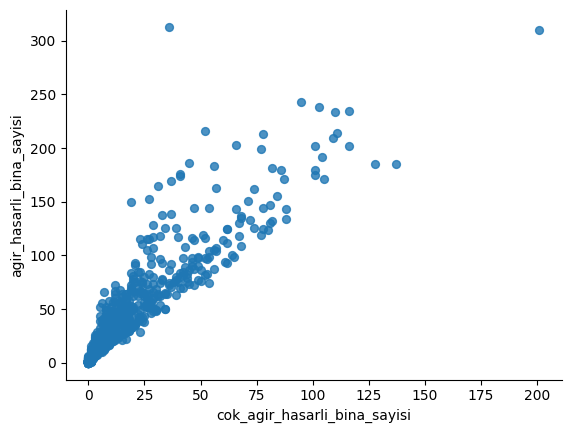

In [ ]:
# @title cok_agir_hasarli_bina_sayisi vs agir_hasarli_bina_sayisi

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cok_agir_hasarli_bina_sayisi', y='agir_hasarli_bina_sayisi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail(3)   #Shows the last 3 rows of the data set

,province_name,neighborhood_name,neighborhood_village_uavt,very_heavily_damaged_building_number,number of_heavily_damaged_buildings,medium_damaged_building_number,light_damaged_building_number,life_loss_number,severe_injury_number,hospital_treatment_number,light_injury_number,natural gas_pipe_damage,drinking_water_pipe_damage,waste_water_pipe_damage,temporary_shelter
956,ZEYTİNBURNU,VELİEFENDİ,40836,39,80,309,530,66,38,175,317,1,1,2,3400
957,ZEYTİNBURNU,YENİDOĞAN,40833,17,33,135,234,24,13,63,114,0,0,1,1715
958,ZEYTİNBURNU,YEŞİLTEPE,40835,26,52,211,374,45,25,118,216,0,0,1,4250


In [ ]:
df.info()   #Shows general information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   province_name                         959 non-null    object
 1   neighborhood_name                     959 non-null    object
 2   neighborhood_village_uavt             959 non-null    int64 
 3   very_heavily_damaged_building_number  959 non-null    int64 
 4   number of_heavily_damaged_buildings   959 non-null    int64 
 5   medium_damaged_building_number        959 non-null    int64 
 6   light_damaged_building_number         959 non-null    int64 
 7   life_loss_number                      959 non-null    int64 
 8   severe_injury_number                  959 non-null    int64 
 9   hospital_treatment_number             959 non-null    int64 
 10  light_injury_number                   959 non-null    int64 
 11  natural gas_pipe_damage         

In [ ]:
df.shape  #Returns the dimensions of the data set (number of rows and columns)

(959, 15)

In [ ]:
df.columns  #Lists the column names in the data set

Index(['province_name', 'neighborhood_name', 'neighborhood_village_uavt',
       'very_heavily_damaged_building_number',
       'number of_heavily_damaged_buildings', 'medium_damaged_building_number',
       'light_damaged_building_number', 'life_loss_number',
       'severe_injury_number', 'hospital_treatment_number',
       'light_injury_number', 'natural gas_pipe_damage',
       'drinking_water_pipe_damage', 'waste_water_pipe_damage',
       'temporary_shelter'],
      dtype='object')

In [ ]:
df.describe().T  #Shows statistical summary of numeric columns by transposing

,count,mean,std,min,25%,50%,75%,max
neighborhood_village_uavt,959.0,70155.974974,57059.328052,16634.0,40371.5,40677.0,40949.5,192001.0
very_heavily_damaged_building_number,959.0,14.072993,21.630965,0.0,1.0,5.0,17.0,201.0
number of_heavily_damaged_buildings,959.0,35.801877,44.955700,0.0,6.0,20.0,48.0,313.0
medium_damaged_building_number,959.0,152.775808,162.244740,0.0,39.0,100.0,214.5,1565.0
light_damaged_building_number,959.0,314.415016,268.199687,2.0,112.5,251.0,440.0,2452.0
life_loss_number,959.0,14.749739,28.838763,0.0,0.0,3.0,13.0,230.0
severe_injury_number,959.0,8.435871,16.524790,0.0,0.0,1.0,8.0,122.0
hospital_treatment_number,959.0,41.330553,75.469817,0.0,1.0,11.0,39.0,592.0
light_injury_number,959.0,78.456726,134.451200,0.0,4.0,26.0,78.5,1028.0
natural gas_pipe_damage,959.0,0.371220,0.604304,0.0,0.0,0.0,1.0,4.0


In [ ]:
df.isnull().any()  #Checks which columns have empty values

,0
province_name,False
neighborhood_name,False
neighborhood_village_uavt,False
very_heavily_damaged_building_number,False
number of_heavily_damaged_buildings,False
medium_damaged_building_number,False
light_damaged_building_number,False
life_loss_number,False
severe_injury_number,False
hospital_treatment_number,False


In [ ]:
df["province_name"].value_counts()   #Shows the frequencies of the values in the 'ilce_adi' column

,count
province_name,
ŞİLE,62
FATİH,57
BEYKOZ,45
BEYOĞLU,45
ESENYURT,43
ÇATALCA,39
SARIYER,38
ARNAVUTKÖY,38
PENDİK,36


In [ ]:
df.groupby("province_name").agg({"life_loss_number":"sum"})  #Calculates the total number of casualties for each district

,life_loss_number
province_name,
ADALAR,76
ARNAVUTKÖY,0
ATAŞEHİR,89
AVCILAR,465
BAHÇELİEVLER,1633
BAKIRKÖY,1046
BAYRAMPAŞA,520
BAĞCILAR,1179
BAŞAKŞEHİR,71


In [ ]:
df.groupby(["province_name", "neighborhood_name"]).agg({"life_loss_number":"sum"})  #Calculates the total number of casualties for each district and neighborhood

life_loss_number
province_name neighborhood_name                  
ADALAR        BURGAZADA                         8
              HEYBELİADA                       25
              KINALIADA                         5
              MADEN                            22
              NİZAM                            16
...                                           ...
ŞİŞLİ         PAŞA                              4
              TEŞVİKİYE                         2
              YAYLA                             3
              İNÖNÜ                             1
              İZZET PAŞA                        2

[959 rows x 1 columns]

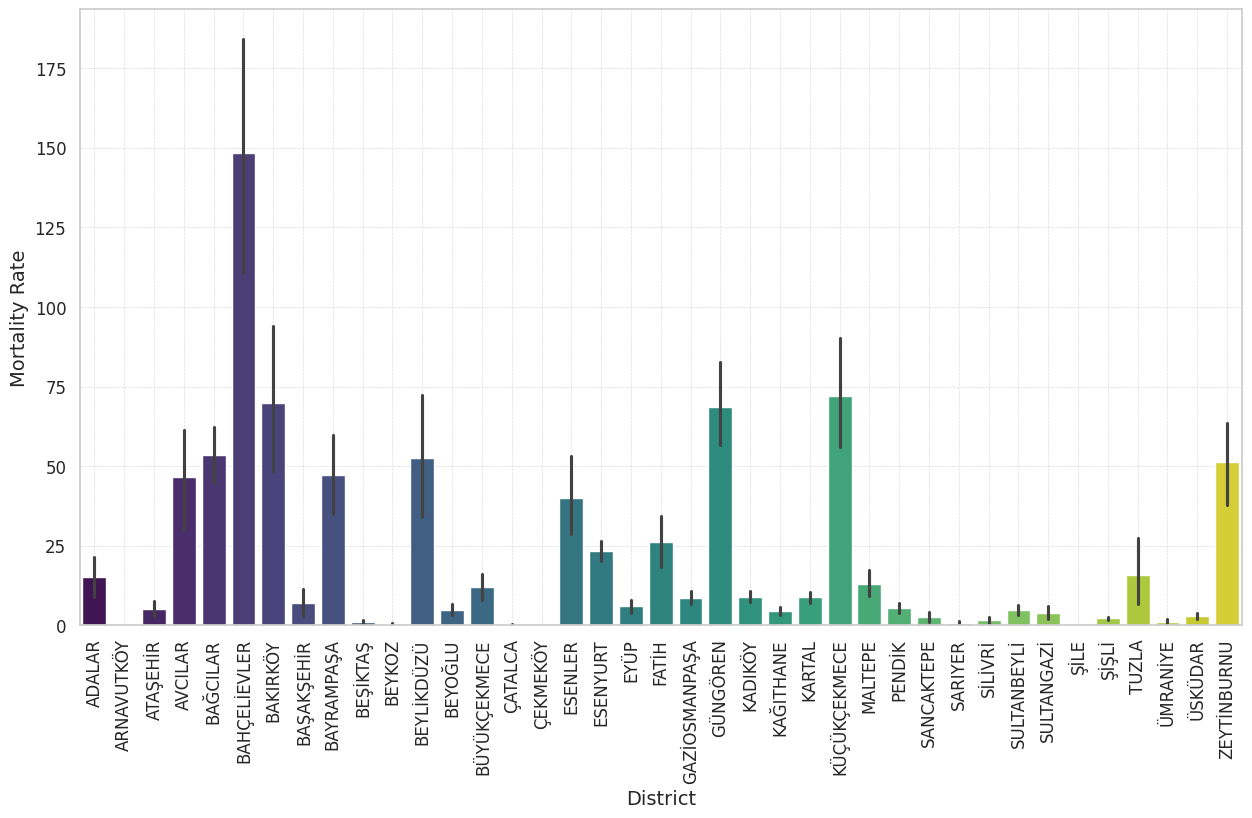

In [ ]:

sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(df['province_name'].unique()))
plt.figure(figsize=(15, 8))
sns.barplot(x="province_name", y="life_loss_number", data=df, palette=palette)                         #Creating a bar chart visualizing mortality rates by district
#plt.title("Mortality Rates by Districts Using Bar Chart", fontsize=16, fontweight='bold')
plt.xlabel("District", fontsize=14)
plt.ylabel("Mortality Rate", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

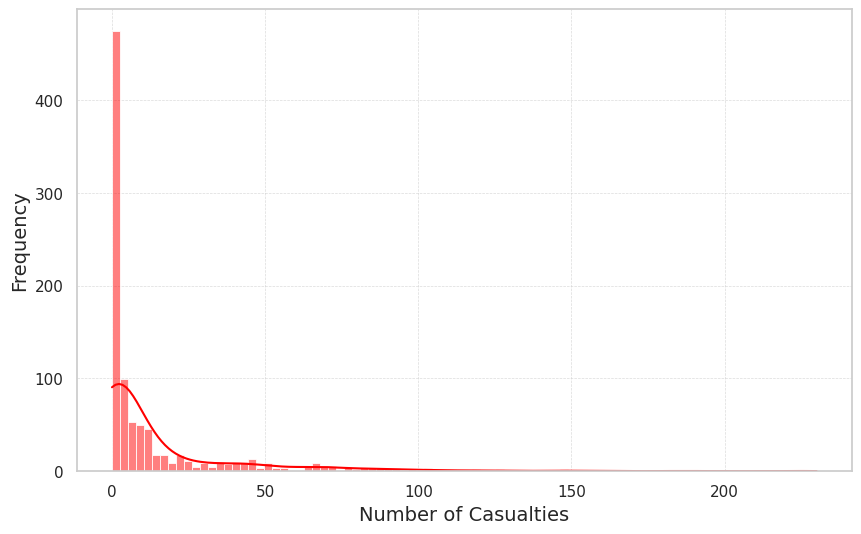

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.life_loss_number, kde = True, color='red')
#plt.title("Distribution of the Number of Casualties by Histogram Graph", fontsize=16, fontweight='bold')
plt.xlabel("Number of Casualties", fontsize=14)                                 #Creates and displays a histogram chart visualizing the distribution of the number of casualties
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [ ]:
df["life_loss_number"].describe()  #Gives a statistical summary of the 'can_kaybi_sayisi' column

,life_loss_number
count,959.000000
mean,14.749739
std,28.838763
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,230.000000


In [ ]:
numeric_df = df.select_dtypes(include=[float, int])  #Selects numeric (float and int) columns in the data set

In [ ]:
corr = numeric_df.corr()  #Calculates the correlation matrix between numeric columns

In [ ]:
print(corr)  #Prints the correlation matrix on the screen

                                      neighborhood_village_uavt  \
neighborhood_village_uavt                              1.000000   
very_heavily_damaged_building_number                  -0.219561   
number of_heavily_damaged_buildings                   -0.264787   
medium_damaged_building_number                        -0.308731   
light_damaged_building_number                         -0.367522   
life_loss_number                                      -0.177390   
severe_injury_number                                  -0.173552   
hospital_treatment_number                             -0.190762   
light_injury_number                                   -0.203439   
natural gas_pipe_damage                               -0.219315   
drinking_water_pipe_damage                            -0.226392   
waste_water_pipe_damage                               -0.257241   
temporary_shelter                                     -0.245601   

                                      very_heavily_damaged_bu

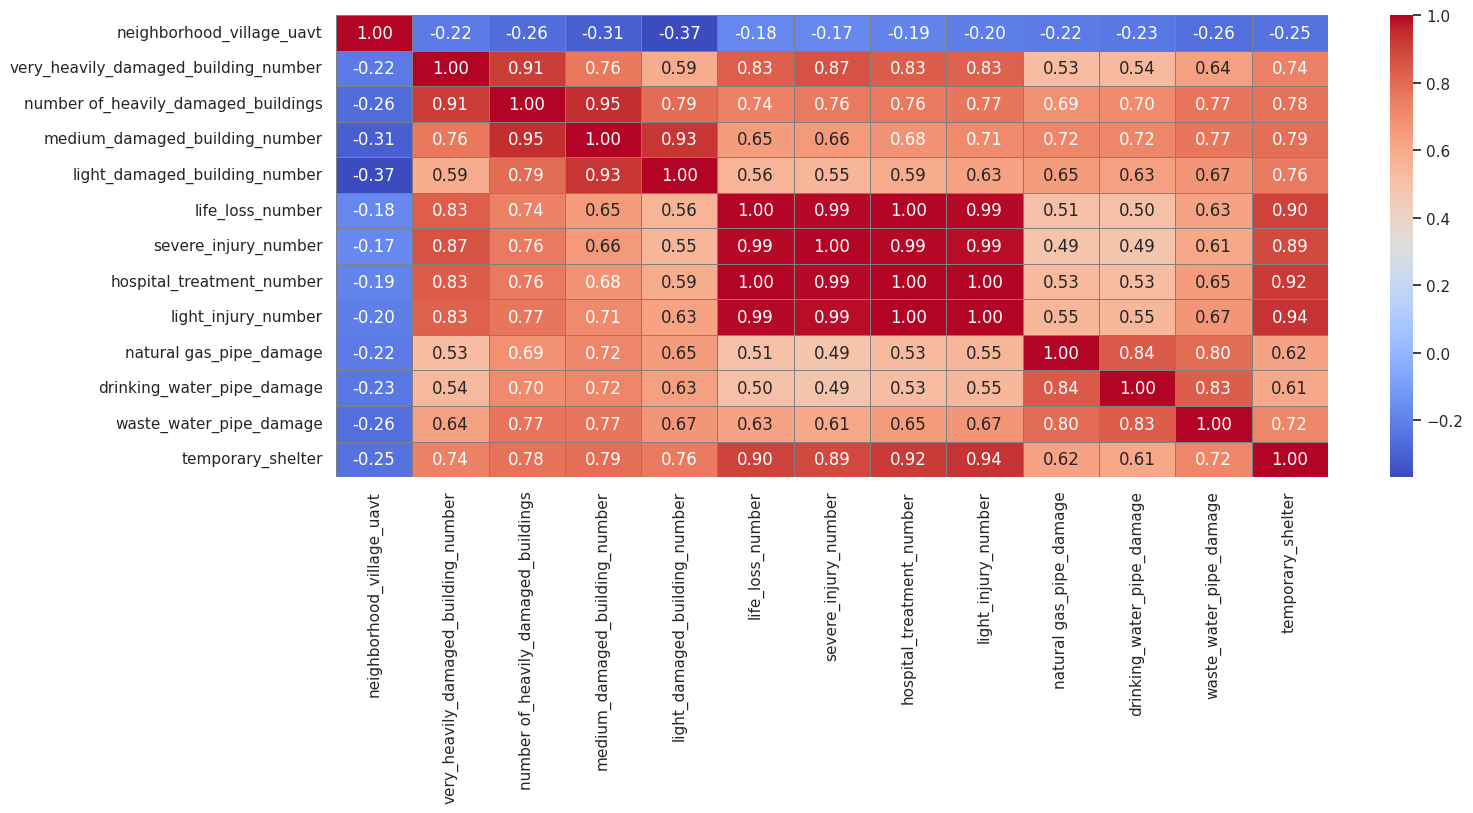

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.6, linecolor='gray')   #Generates and displays heat map visualizing correlations between numerical columns
#plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
plt.show()

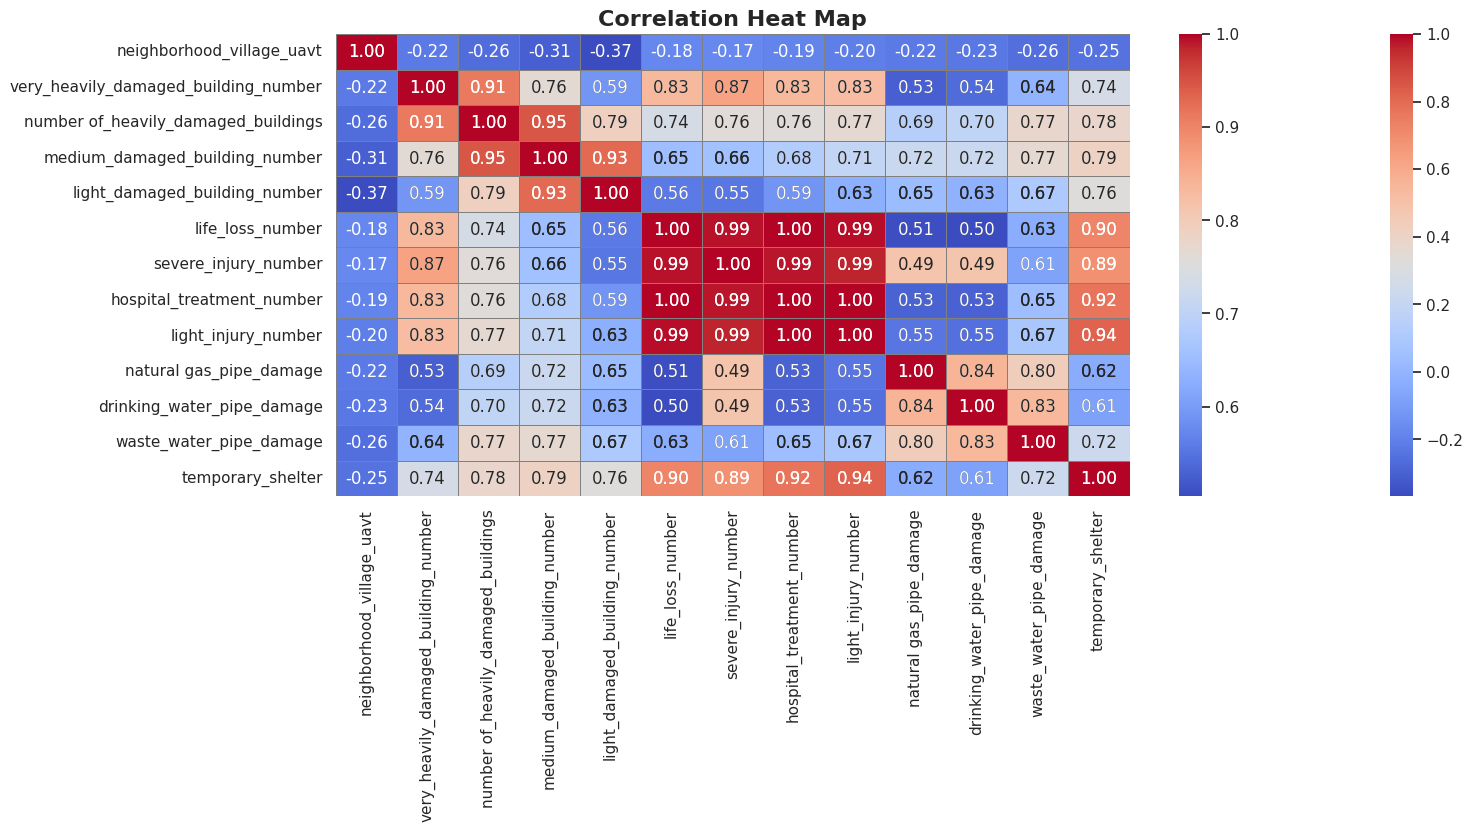

In [ ]:
plt.figure(figsize=(16, 6))       #Creates and displays the heatmap hiding correlation values less than 0.5
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
mask = np.zeros_like(corr)
mask[np.abs(corr) < 0.5] = True
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray', mask=mask)

plt.show()

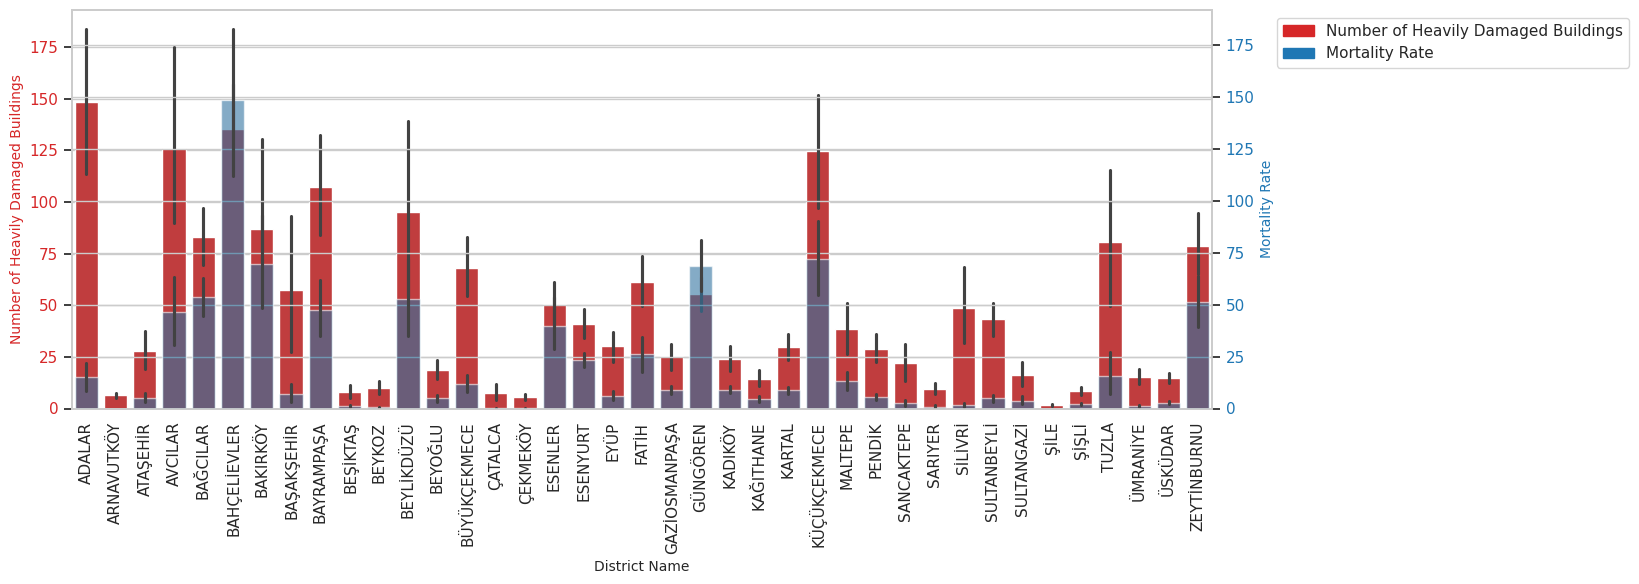

In [ ]:
fig, ax1 = plt.subplots(figsize=(13, 6))

color = 'tab:red'
ax1.set_xlabel('District Name', fontsize=10)
ax1.set_ylabel('Number of Heavily Damaged Buildings', fontsize=10, color=color)
sns.barplot(x='province_name', y='number of_heavily_damaged_buildings', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)
                                              #Constructs and displays a biaxial bar graph showing the number of severely damaged buildings and mortality rate by districts
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mortality Rate', fontsize=10, color=color)
sns.barplot(x='province_name', y='life_loss_number', data=df, ax=ax2, alpha=0.6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#plt.title("Bar Chart of Severely Damaged Buildings and Mortality Rate by District", fontsize=14, fontweight='bold')
fig.tight_layout()

red_patch = Patch(color='tab:red', label='Number of Heavily Damaged Buildings')
blue_patch = Patch(color='tab:blue', label='Mortality Rate')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()




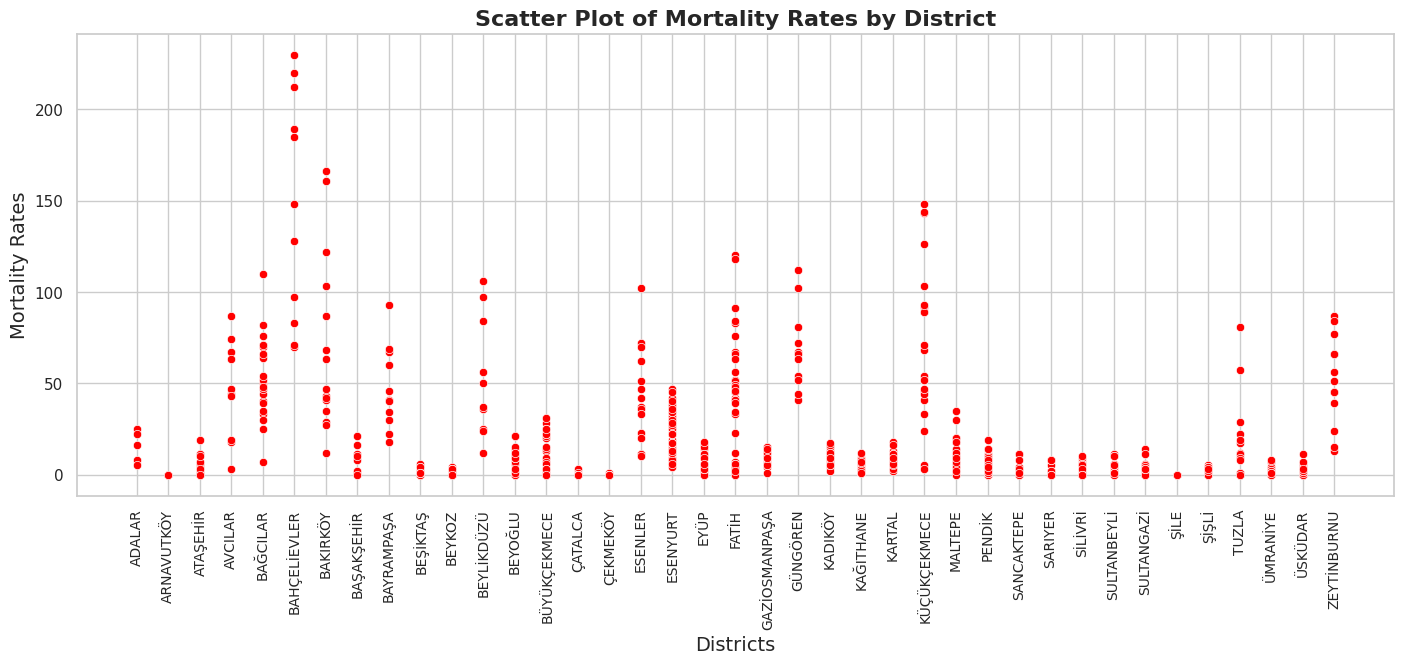

In [ ]:
plt.figure(figsize=(17, 6))
sns.scatterplot(x="ilce_adi", y="can_kaybi_sayisi", color= "red", data=df)
plt.title("Scatter Plot of Mortality Rates by District", fontsize=16, fontweight= 'bold')
plt.xticks(rotation=90, fontsize=10)            #Creates and displays a scatter graph showing mortality rates by districts
plt.xlabel("Districts", fontsize=14)
plt.ylabel("Mortality Rates", fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(17,6))
sns.lineplot(x= "ilce_adi", y= "can_kaybi_sayisi", data = df);
plt.title("Line Plot of Mortality Rates by District", fontsize= 17, fontweight= 'bold')
plt.xticks(rotation = 90, fontsize=9)   #Creates and displays a line graph showing mortality rates by districts
plt.xlabel("Districts", fontsize= 13)
plt.ylabel("Mortality Rates", fontsize=13)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1700x600 with 0 Axes>

In [ ]:
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=11, train_size=0.70)  #Splits features and target variables into 70% training and 30% testing

In [ ]:
scaler = StandardScaler()      #Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=11)  #Creates a 300-tree RandomForestRegressor model and uses a fixed randomness value to control randomness

In [ ]:
model2 = rf.fit(x_train_scaled, y_train)    #Trains the RandomForestRegressor model with scaled training data

In [ ]:
model2.score(x_test_scaled, y_test)   #Calculates the R² (determination) score of the model on test data and evaluates how well the model performs

0.9952491180749701

In [ ]:
y_pred = rf.predict(x_test_scaled)  #Enables the model to make predictions by making predictions on test data

In [ ]:
mse = mean_squared_error(y_test, y_pred)  #Calculate the mean squared error (MSE) between actual and predicted values
r2 = r2_score(y_test, y_pred)  #Calculates the R² (determination) score of the model

print(f"RandomForestRegressor MSE: {mse}")  #Prints the mean squared error (MSE) value on the screen
print(f"RandomForestRegressor R^2 Score: {r2}")  #Prints the R² score on the screen

RandomForestRegressor MSE: 3.7364529320987634
RandomForestRegressor R^2 Score: 0.9952491180749701


In [ ]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Eğitim veri seti üzerinde modelin eğitilmesi ve eğitim süresinin ölçülmesi
start_train_time = time.time()
rf = RandomForestRegressor(n_estimators=300, random_state=11)
model2 = rf.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = rf.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = rf.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")




Training MSE: 0.7991340784898158
Training MAE: 0.29001987083954295
Training R^2 Score: 0.9990594000392128
Testing MSE: 3.7364529320987634
Testing MAE: 0.7898379629629628
Testing R^2 Score: 0.9952491180749701
Training Time: 1.1440808773040771 seconds
Testing Time: 0.024466276168823242 seconds


                                 Feature  Importance
5              hospital_treatment_number    0.807413
6                    light_injury_number    0.104678
4                   severe_injury_number    0.081103
10                     temporary_shelter    0.003573
3          light_damaged_building_number    0.000883
1    number of_heavily_damaged_buildings    0.000701
2         medium_damaged_building_number    0.000524
0   very_heavily_damaged_building_number    0.000447
9                waste_water_pipe_damage    0.000282
8             drinking_water_pipe_damage    0.000229
7                natural gas_pipe_damage    0.000167


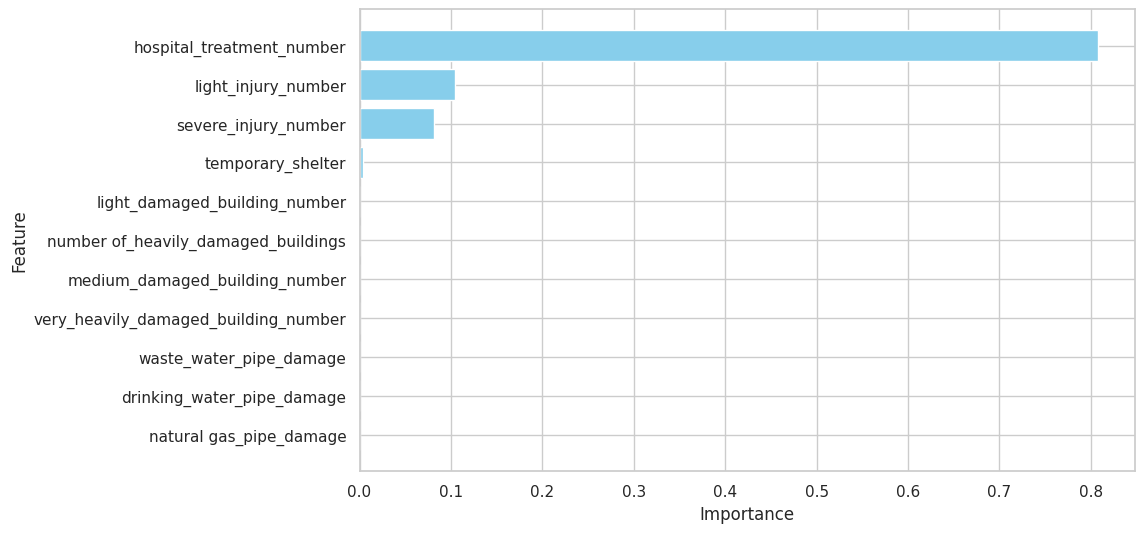

In [ ]:
#Calculates the features of the model in order of importance and shows the most important features in order of highest to lowest importance

import pandas as pd
import matplotlib.pyplot as plt

# Özelliklerin önem derecelerini içeren DataFrame
feature_importances = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
# Bar grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()


In [ ]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=11, train_size=0.70)  #Splits features and target variables into 70% training and 30% testing


scaler = StandardScaler()      #Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Eğitim veri seti üzerinde modelin eğitilmesi ve eğitim süresinin ölçülmesi
start_train_time = time.time()
lr = LinearRegression()
model_lr = lr.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = lr.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = lr.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


Training MSE: 0.48854761099833577
Training MAE: 0.4730951971212816
Training R^2 Score: 0.9994249677543271
Testing MSE: 0.576072467315381
Testing MAE: 0.5046742771878443
Testing R^2 Score: 0.9992675266296105
Training Time: 0.004721164703369141 seconds
Testing Time: 0.0004303455352783203 seconds


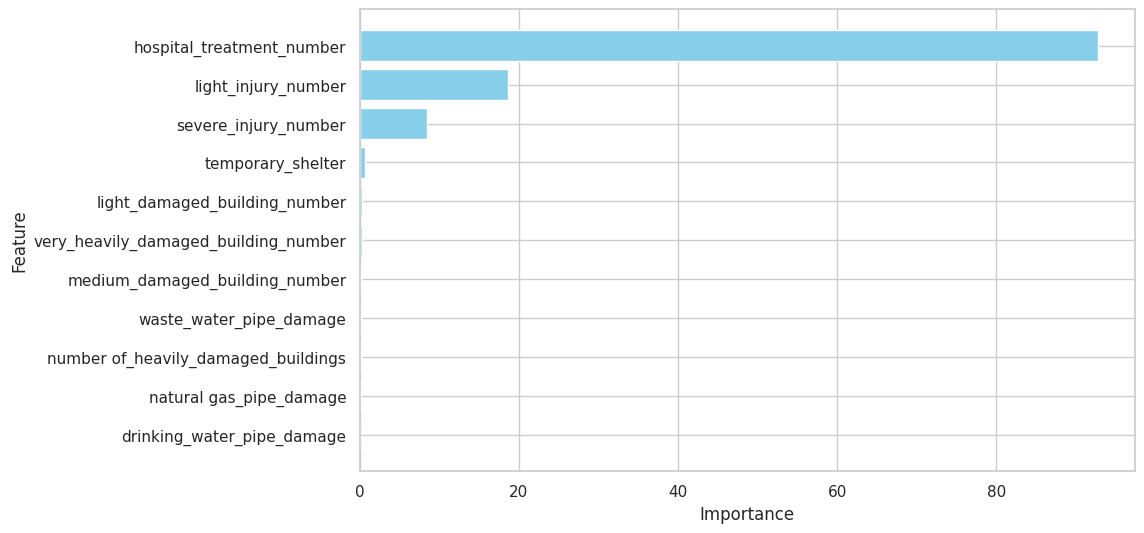

In [ ]:
!pip install shap

import shap
import matplotlib.pyplot as plt

# Modelin SHAP değerlerini hesapla
explainer = shap.TreeExplainer(rf)  # rf, rastgele orman modeliniz
shap_values = explainer.shap_values(x)

# Özelliklerin önem derecelerini hesapla
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Bar grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.title('Feature Importance using SHAP')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()


In [ ]:
import time
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=11, train_size=0.70)  #Splits features and target variables into 70% training and 30% testing


scaler = StandardScaler()      #Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Eğitim veri seti üzerinde modelin eğitilmesi ve eğitim süresinin ölçülmesi
start_train_time = time.time()
svm = SVR()  # Varsayılan parametrelerle SVR modelini oluştur
model2 = svm.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = svm.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = svm.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


Training MSE: 379.62639383474516
Training MAE: 5.559899917706736
Training R^2 Score: 0.553170637110673
Testing MSE: 344.1127784334279
Testing MAE: 4.872551237136889
Testing R^2 Score: 0.5624622579380574
Training Time: 0.026516437530517578 seconds
Testing Time: 0.009442806243896484 seconds


In [ ]:
import time
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)  # Splits features and target variables into 70% training and 30% testing

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVR için parametrelerin tanımlanması
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']  # 'poly' ve diğer kernel türlerini de deneyebilirsiniz
}

# Grid Search ile en iyi parametrelerin bulunması
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi SVR modelini alma
best_svr = grid_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_svr.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_svr.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Training MSE: 0.5562237709252597
Training MAE: 0.49764080045107223
Training R^2 Score: 0.9993453112923054
Testing MSE: 0.6855993618537334
Testing MAE: 0.5324946973493615
Testing R^2 Score: 0.9991282637101992
Training Time: 12.347800254821777 seconds
Testing Time: 0.009272336959838867 seconds


In [ ]:
import time
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)  # Splits features and target variables into 70% training and 30% testing

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# XGBoost için parametrelerin tanımlanması
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Grid Search ile en iyi parametrelerin bulunması
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=5)
start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi XGBoost modelini alma
best_xgb = grid_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_xgb.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_xgb.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Training MSE: 0.025882455088402142
Training MAE: 0.10900794305899715
Training R^2 Score: 0.9999695357301153
Testing MSE: 2.681591670096353
Testing MAE: 0.7702553724189379
Testing R^2 Score: 0.9965903690940874
Training Time: 270.100177526474 seconds
Testing Time: 0.002260923385620117 seconds


Top Features Based on Mutual Information: ['hospital_treatment_number', 'severe_injury_number', 'light_injury_number', 'temporary_shelter', 'very_heavily_damaged_building_number']
Best parameters: {'fit_intercept': True}
Training MSE: 0.6791876616561944
Training MAE: 0.5281204714540143
Training R^2 Score: 0.9992005798462152
Testing MSE: 0.6032759589922322
Testing MAE: 0.5418332761694523
Testing R^2 Score: 0.9992329375208344
Training Time: 0.003203153610229492 seconds
Testing Time: 0.0003726482391357422 seconds


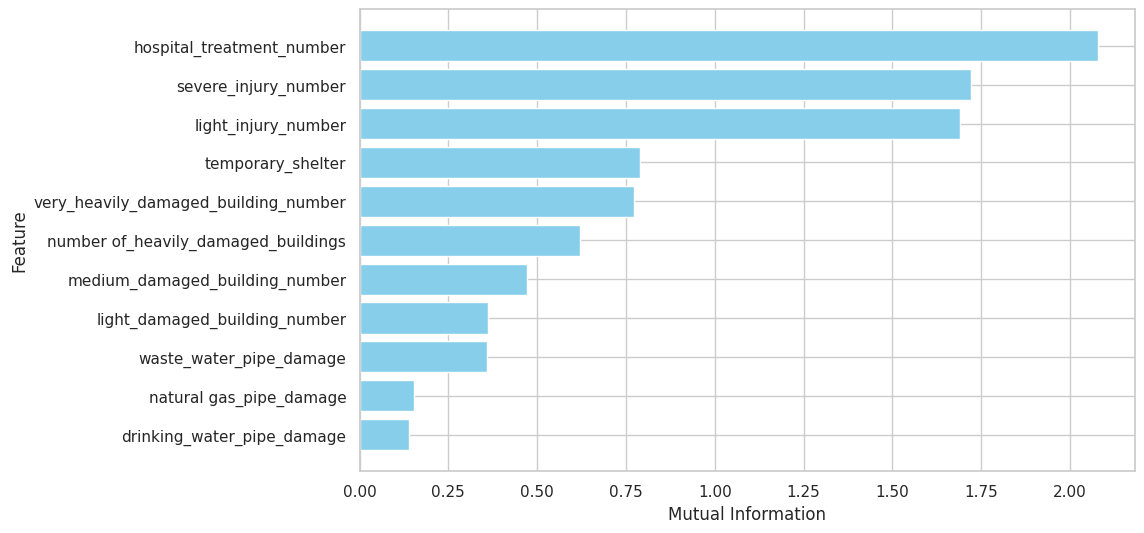

Top Features Based on Mutual Information: ['hospital_treatment_number', 'light_injury_number', 'severe_injury_number', 'very_heavily_damaged_building_number', 'temporary_shelter']
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training MSE: 0.7305734724292096
Training MAE: 0.29472429210134127
Training R^2 Score: 0.9991400975155287
Testing MSE: 3.4928125000000008
Testing MAE: 0.8127083333333334
Testing R^2 Score: 0.9955589057120953
Training Time: 0.540024995803833 seconds
Testing Time: 0.026392459869384766 seconds


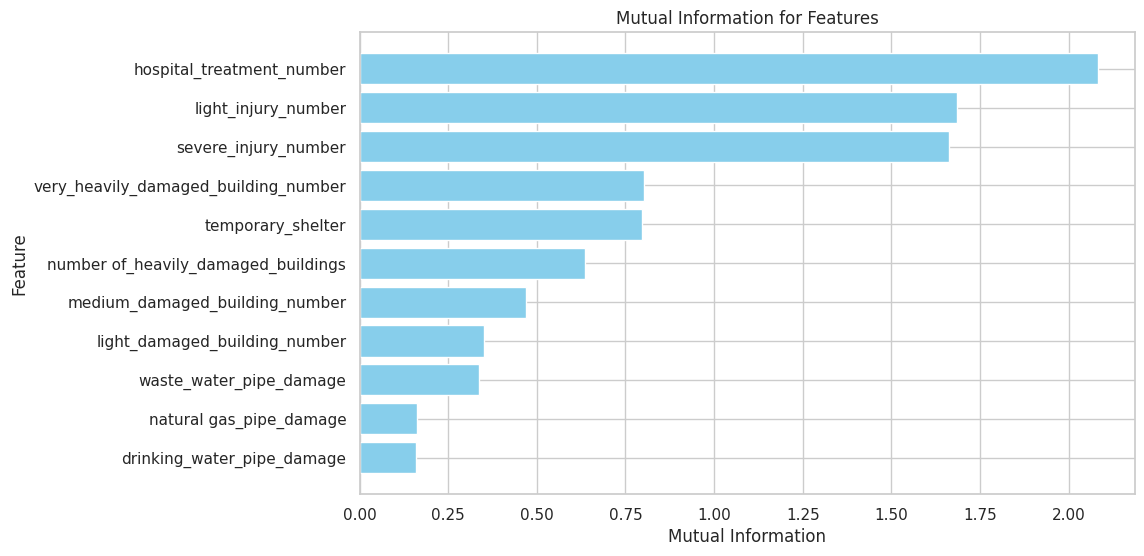

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Veri setinin yüklenmesi
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Özelliklerin Mutual Information hesaplanması
mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({
    'Feature': x.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# En önemli 5 özelliği seçme
top_features = mi_df['Feature'].head(5)
x_selected = x[top_features]
print(f"Top Features Based on Mutual Information: {top_features.tolist()}")

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Linear Regression modeli oluşturulması ve eğitim süresinin ölçülmesi
start_train_time = time.time()
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = lr.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = lr.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# GridSearchCV kullanarak hiperparametrelerin ayarlanması (örnek için kullanıldı, LinearRegression'da genellikle gerekmez)
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Sonuçların yazdırılması
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

# Mutual Information grafiği
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
#plt.title('Mutual Information for Features')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()



import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import time

# Veri setinin yüklenmesi
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Özelliklerin Mutual Information hesaplanması
mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({
    'Feature': x.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# En önemli 5 özelliği seçme
top_features = mi_df['Feature'].head(5)
x_selected = x[top_features]
print(f"Top Features Based on Mutual Information: {top_features.tolist()}")

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# RandomForestRegressor modeli oluşturulması ve eğitim süresinin ölçülmesi
start_train_time = time.time()
rf = RandomForestRegressor(random_state=11)
rf.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = rf.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = rf.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# GridSearchCV kullanarak hiperparametrelerin ayarlanması
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Sonuçların yazdırılması
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

# Mutual Information grafiği
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
#plt.title('Mutual Information for Features')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()





In [ ]:
!pip install catboost

import time
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)  # Splits features and target variables into 70% training and 30% testing

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# CatBoost için parametrelerin tanımlanması
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid Search ile en iyi parametrelerin bulunması
grid_search = GridSearchCV(CatBoostRegressor(silent=True), param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi CatBoost modelini alma
best_catboost = grid_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_catboost.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_catboost.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


KeyboardInterrupt: 

In [ ]:
!pip install catboost

import time
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)  # Splits features and target variables into 70% training and 30% testing

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# CatBoost için parametrelerin tanımlanması
param_distributions = {
    'iterations': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Randomized Search ile en iyi parametrelerin bulunması
random_search = RandomizedSearchCV(CatBoostRegressor(silent=True), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi CatBoost modelini alma
best_catboost = random_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_catboost.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_catboost.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Best parameters: {random_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


Best parameters: {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.05080187545964305}
Training MSE: 1.1015919344420564
Training MAE: 0.6905979144771819
Training R^2 Score: 0.9987033998946737
Testing MSE: 2.736816810558409
Testing MAE: 0.9007055541520993
Testing R^2 Score: 0.9965201505937085
Training Time: 111.23181581497192 seconds
Testing Time: 0.0011799335479736328 seconds


100%|██████████| 5/5 [00:00<00:00, 10.25it/s]


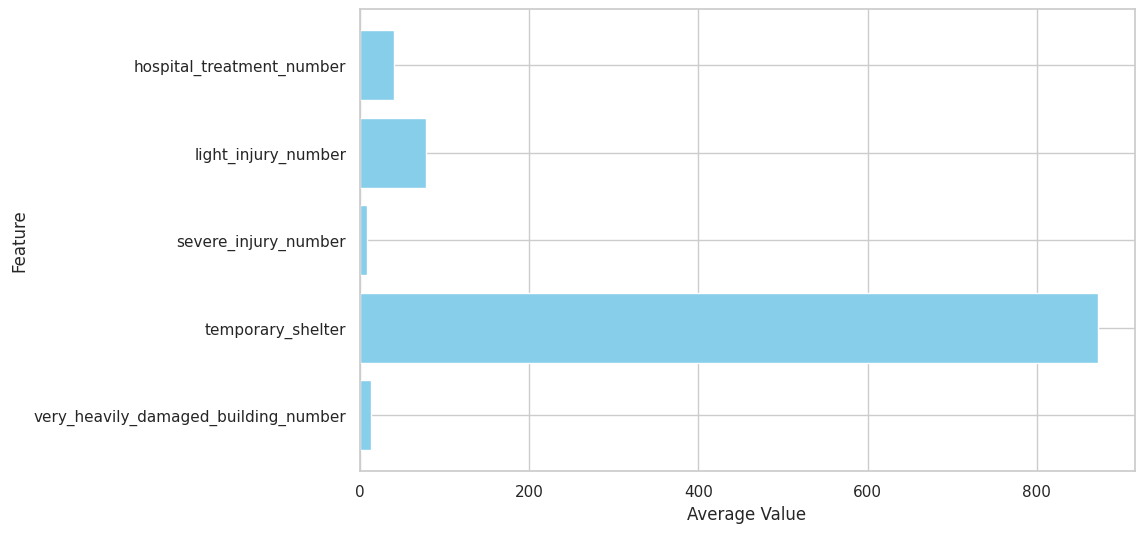

Selected Features: ['hospital_treatment_number', 'light_injury_number', 'severe_injury_number', 'temporary_shelter', 'very_heavily_damaged_building_number']
Best parameters: {'depth': 5, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.04721739116369303}
Training MSE: 0.6192797746031784
Training MAE: 0.5421881384883245
Training R^2 Score: 0.9992710928649059
Testing MSE: 2.5398062445489185
Testing MAE: 0.8246377343796905
Testing R^2 Score: 0.9967706485804632
Training Time: 86.50345253944397 seconds
Testing Time: 0.0019068717956542969 seconds


In [ ]:
!pip install mrmr_selection

import time
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mrmr import mrmr_regression
from scipy.stats import uniform

# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Özellik seçimi - mRMR
selected_features = mrmr_regression(X=x, y=y, K=5)  # En iyi 5 özelliği seçiyoruz
x_selected = x[selected_features]

# Seçilen özelliklerin bar grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')
#plt.title('Top 5 Features Selected with mRMR')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# CatBoost için parametrelerin tanımlanması
param_distributions = {
    'iterations': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Randomized Search ile en iyi parametrelerin bulunması
random_search = RandomizedSearchCV(CatBoostRegressor(silent=True), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi CatBoost modelini alma
best_catboost = random_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_catboost.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_catboost.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")




100%|██████████| 5/5 [00:00<00:00, 33.98it/s]


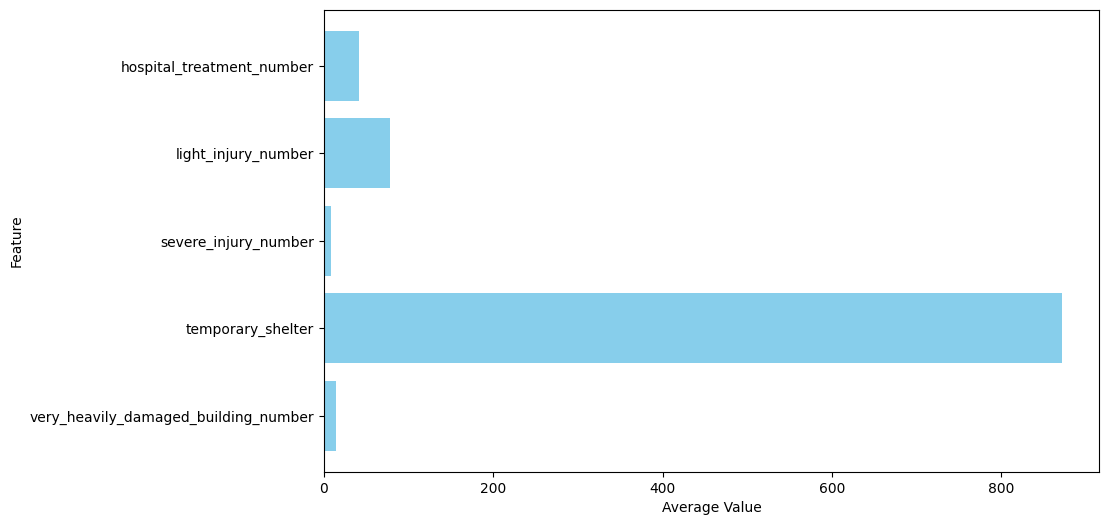

Selected Features: ['hospital_treatment_number', 'light_injury_number', 'severe_injury_number', 'temporary_shelter', 'very_heavily_damaged_building_number']
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training MSE: 1.854143959629015
Training MAE: 0.5122530158396548
Training R^2 Score: 0.9978176281269137
Testing MSE: 4.978872921520166
Testing MAE: 0.9902824812168818
Testing R^2 Score: 0.9936693870363877
Training Time: 1.7093560695648193 seconds
Testing Time: 0.0005357265472412109 seconds


In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mrmr import mrmr_regression
from scipy.stats import randint

# Veri setinin hazırlanması
y = df[["life_loss_number"]]  # Hedef değişken
x = df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Özellik seçimi - mRMR
selected_features = mrmr_regression(X=x, y=y, K=5)  # En iyi 5 özelliği seçiyoruz
x_selected = x[selected_features]

# Seçilen özelliklerin bar grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Decision Tree için parametrelerin tanımlanması
param_distributions = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Randomized Search ile en iyi parametrelerin bulunması
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=11), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi Decision Tree modelini alma
best_tree = random_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_tree.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_tree.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


100%|██████████| 5/5 [00:00<00:00, 38.73it/s]


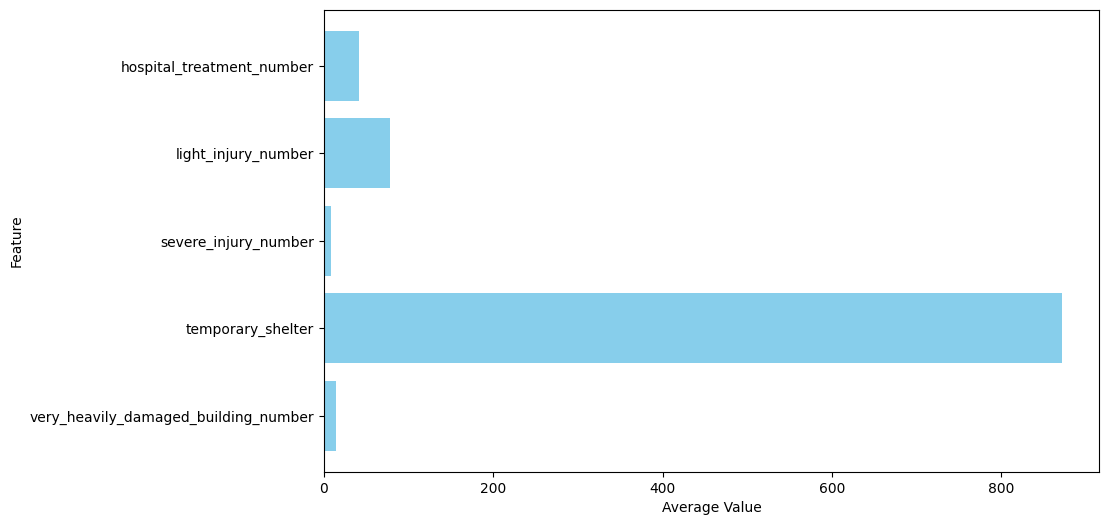

Selected Features: ['hospital_treatment_number', 'light_injury_number', 'severe_injury_number', 'temporary_shelter', 'very_heavily_damaged_building_number']
Best parameters: {'max_depth': 18, 'max_features': 0.8833092099413072, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 348}
Training MSE: 0.7825719179918453
Training MAE: 0.2875075597279962
Training R^2 Score: 0.9990788940990136
Testing MSE: 1.8126519511944754
Testing MAE: 0.6982590893944453
Testing R^2 Score: 0.9976952217657235
Training Time: 65.65492248535156 seconds
Testing Time: 0.025847196578979492 seconds


In [ ]:
!pip install mrmr_selection
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mrmr import mrmr_regression
from scipy.stats import randint, uniform

# Veri setinin hazırlanması
y = df[["life_loss_number"]]  # Hedef değişken
x = df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Özellik seçimi - mRMR
selected_features = mrmr_regression(X=x, y=y, K=5)  # En iyi 5 özelliği seçiyoruz
x_selected = x[selected_features]

# Seçilen özelliklerin bar grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Extra Trees için parametrelerin tanımlanması
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 1.0)
}

# Randomized Search ile en iyi parametrelerin bulunması
random_search = RandomizedSearchCV(ExtraTreesRegressor(random_state=11), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi Extra Trees modelini alma
best_extra_trees = random_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_extra_trees.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_extra_trees.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


100%|██████████| 5/5 [00:00<00:00, 30.32it/s]


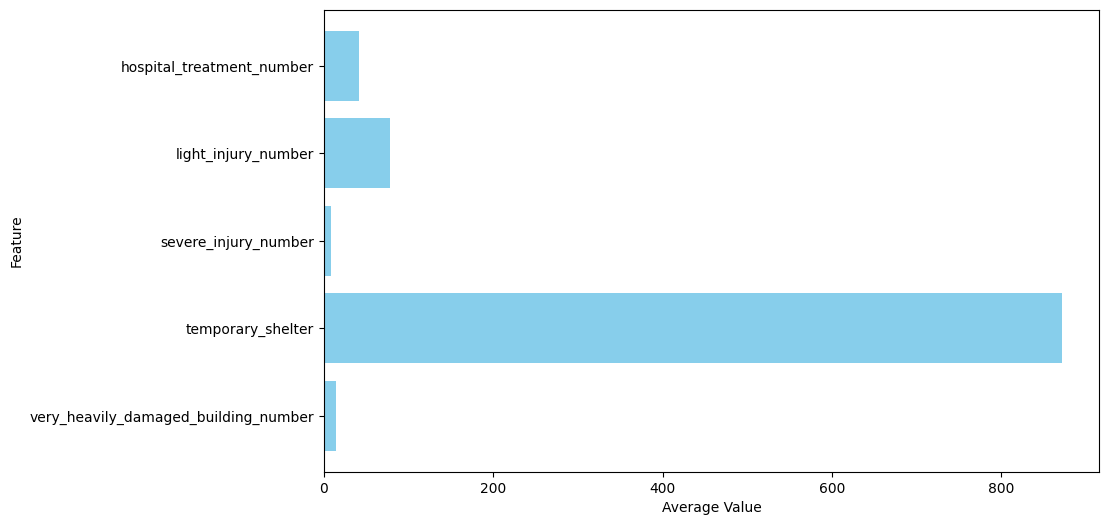

Selected Features: ['hospital_treatment_number', 'light_injury_number', 'severe_injury_number', 'temporary_shelter', 'very_heavily_damaged_building_number']
Best parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Training MSE: 0.0
Training MAE: 0.0
Training R^2 Score: 1.0
Testing MSE: 4.973740457261262
Testing MAE: 1.1074921223586311
Testing R^2 Score: 0.9936759129399979
Training Time: 1.8715059757232666 seconds
Testing Time: 0.009004354476928711 seconds


In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mrmr import mrmr_regression
from scipy.stats import randint, uniform

# Veri setinin hazırlanması
y = df[["life_loss_number"]]  # Hedef değişken
x = df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Özellik seçimi - mRMR
selected_features = mrmr_regression(X=x, y=y, K=5)  # En iyi 5 özelliği seçiyoruz
x_selected = x[selected_features]

# Seçilen özelliklerin bar grafiğini oluşturma
plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# K-Nearest Neighbors için parametrelerin tanımlanması
param_distributions = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 Manhattan distance, p=2 Euclidean distance
}

# Randomized Search ile en iyi parametrelerin bulunması
random_search = RandomizedSearchCV(KNeighborsRegressor(), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# En iyi K-Nearest Neighbors modelini alma
best_knn = random_search.best_estimator_

# Eğitim veri seti için tahminler ve metriklerin hesaplanması
y_train_pred = best_knn.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test veri seti üzerinde tahminlerin yapılması ve test süresinin ölçülmesi
start_test_time = time.time()
y_test_pred = best_knn.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

# Test veri seti için metriklerin hesaplanması
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçların yazdırılması
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")


In [ ]:
!pip install boruta
!pip install shap

import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")  #File Included in Page
# Veri setinin hazırlanması

y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Boruta ile özellik seçimi
rf = RandomForestRegressor(n_estimators=100, random_state=11)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=11, verbose=2)
boruta_selector.fit(x_train_scaled, y_train.values.ravel())

# Seçilen özellikleri belirleme
selected_features = x.columns[boruta_selector.support_]
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# SHAP değerlerini hesapla
explainer = shap.TreeExplainer(rf, feature_perturbation='interventional')
shap_values = explainer.shap_values(x_train_selected, check_additivity=False)

# Özelliklerin önem derecelerini hesapla
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Bar grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using SHAP and Boruta')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

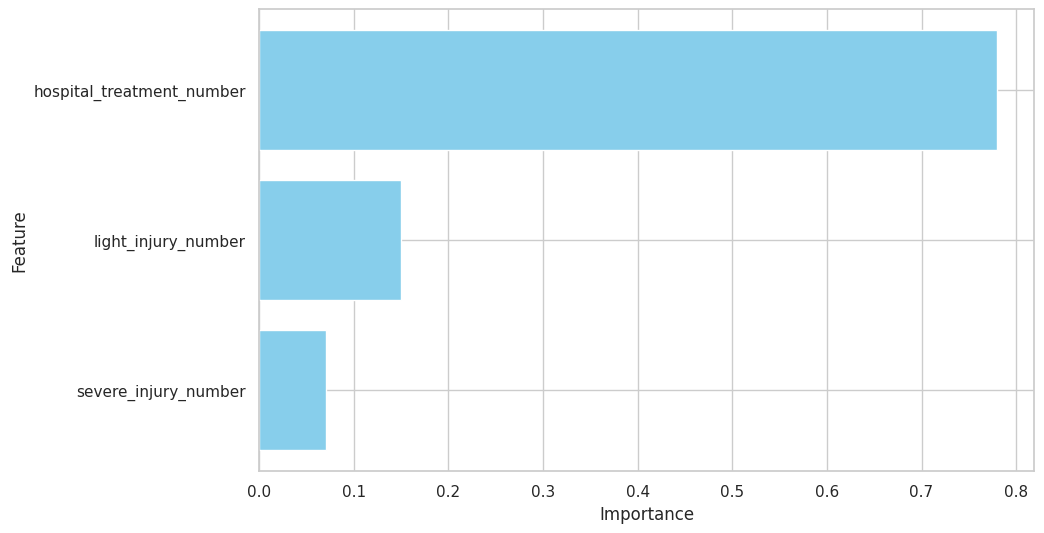

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin yüklenmesi
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")  # Dosya yükleniyor

# Veri setinin hazırlanması

y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Boruta ile özellik seçimi
rf = RandomForestRegressor(n_estimators=100, random_state=11)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=11, verbose=2)
boruta_selector.fit(x_train_scaled, y_train.values.ravel())

# Seçilen özellikleri belirleme
selected_features = x.columns[boruta_selector.support_]
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# Seçilen özelliklerle yeniden model eğitimi
rf_selected = RandomForestRegressor(n_estimators=100, random_state=11)
rf_selected.fit(x_train_selected, y_train)

# Özellik önem derecelerini belirleme
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_selected.feature_importances_
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Bar grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.title('Feature Importance using Boruta')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

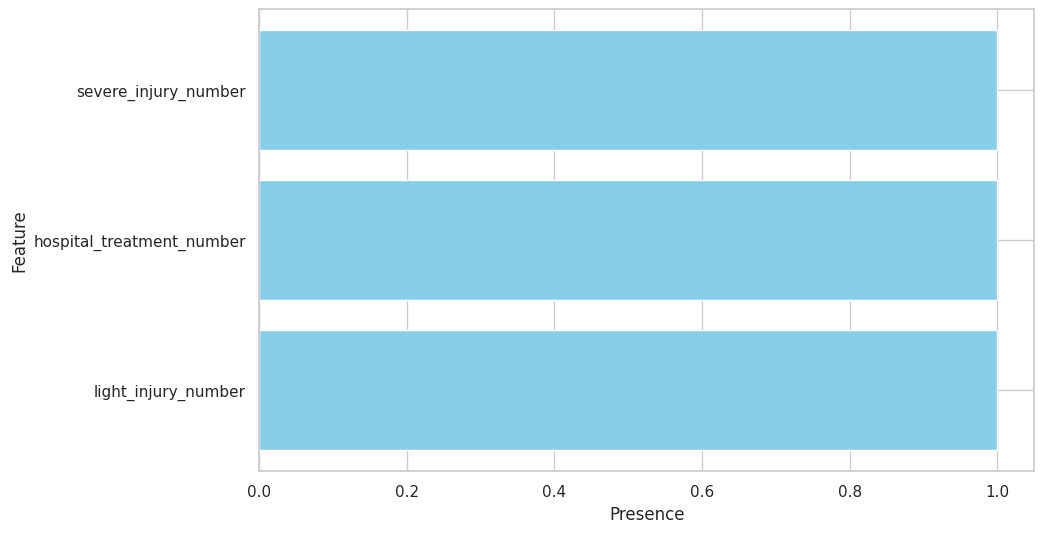

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin yüklenmesi
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")  # Dosya yükleniyor


# Veri setinin hazırlanması
y = df[["life_loss_number"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["life_loss_number", "neighborhood_village_uavt", "province_name", "neighborhood_name"], axis=1)

# Eğitim ve test setlerinin oluşturulması
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)

# Özelliklerin ölçeklenmesi
scaler = StandardScaler()  # Standardizasyon işlemi
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Boruta ile özellik seçimi
rf = RandomForestRegressor(n_estimators=100, random_state=11)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=11, verbose=2)
boruta_selector.fit(x_train_scaled, y_train.values.ravel())

# Seçilen özellikleri belirleme
selected_features = x.columns[boruta_selector.support_]

# Bar grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.barh(selected_features, np.ones_like(selected_features), color='skyblue')
plt.xlabel('Presence')
plt.ylabel('Feature')
#plt.title('Features Selected by Boruta')
plt.gca().invert_yaxis()  # Özelliklerin en önemlisi en üstte görünsün
plt.show()


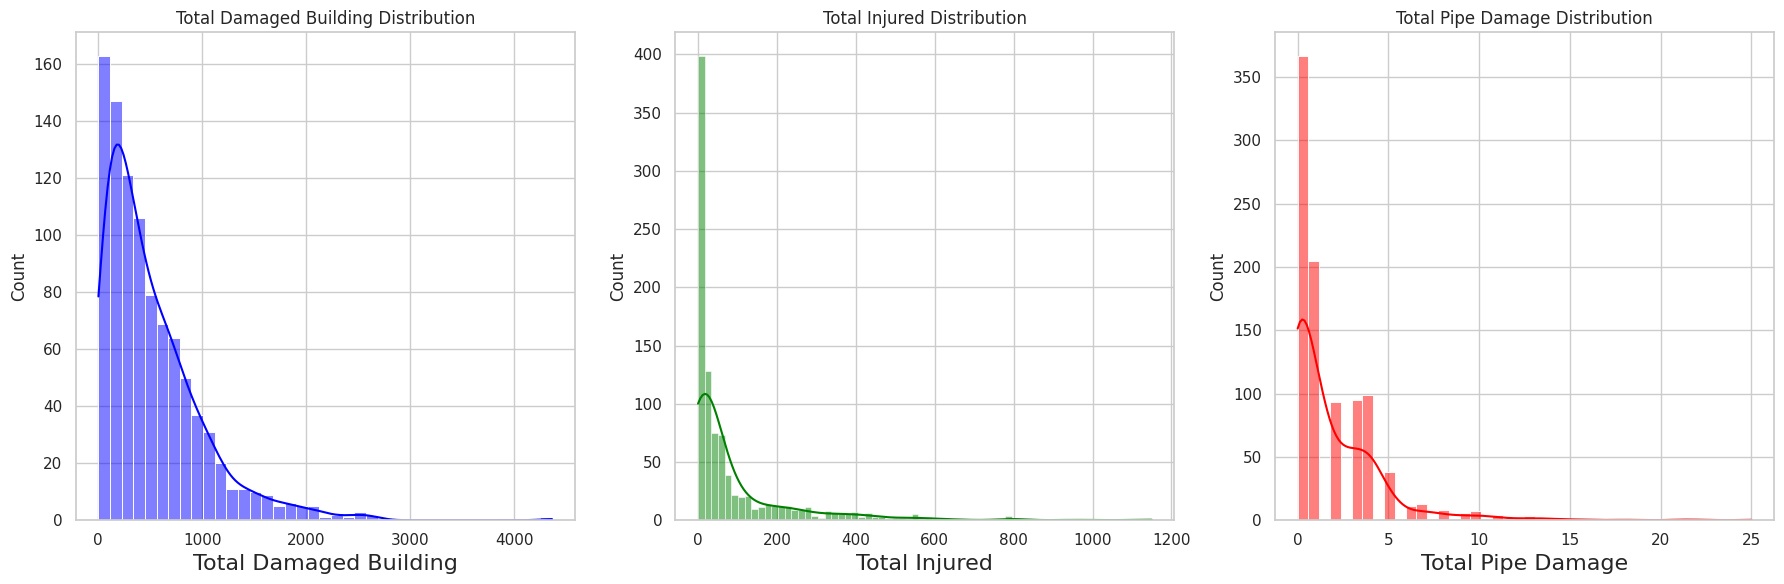

In [ ]:
df['toplam_hasarli_bina'] = df['cok_agir_hasarli_bina_sayisi'] + df['agir_hasarli_bina_sayisi'] + df['orta_hasarli_bina_sayisi'] + df['hafif_hasarli_bina_sayisi']
df['toplam_yarali'] = df['agir_yarali_sayisi'] + df['hafif_yarali_sayisi']
df['toplam_boru_hasari'] = df['dogalgaz_boru_hasari'] + df['icme_suyu_boru_hasari'] + df['atik_su_boru_hasari']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['toplam_hasarli_bina'], kde=True, color='blue')
plt.xlabel("Total Damaged Building", fontsize= 16)
plt.title('Total Damaged Building Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['toplam_yarali'], kde=True, color='green')
plt.xlabel("Total Injured", fontsize= 16)
plt.title('Total Injured Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['toplam_boru_hasari'], kde=True, color='red')
plt.xlabel("Total Pipe Damage", fontsize= 16)
plt.title('Total Pipe Damage Distribution')

plt.tight_layout()
plt.show()

#Creates and displays three histogram plots showing the distribution of total damaged buildings, total injured and total pipe damage

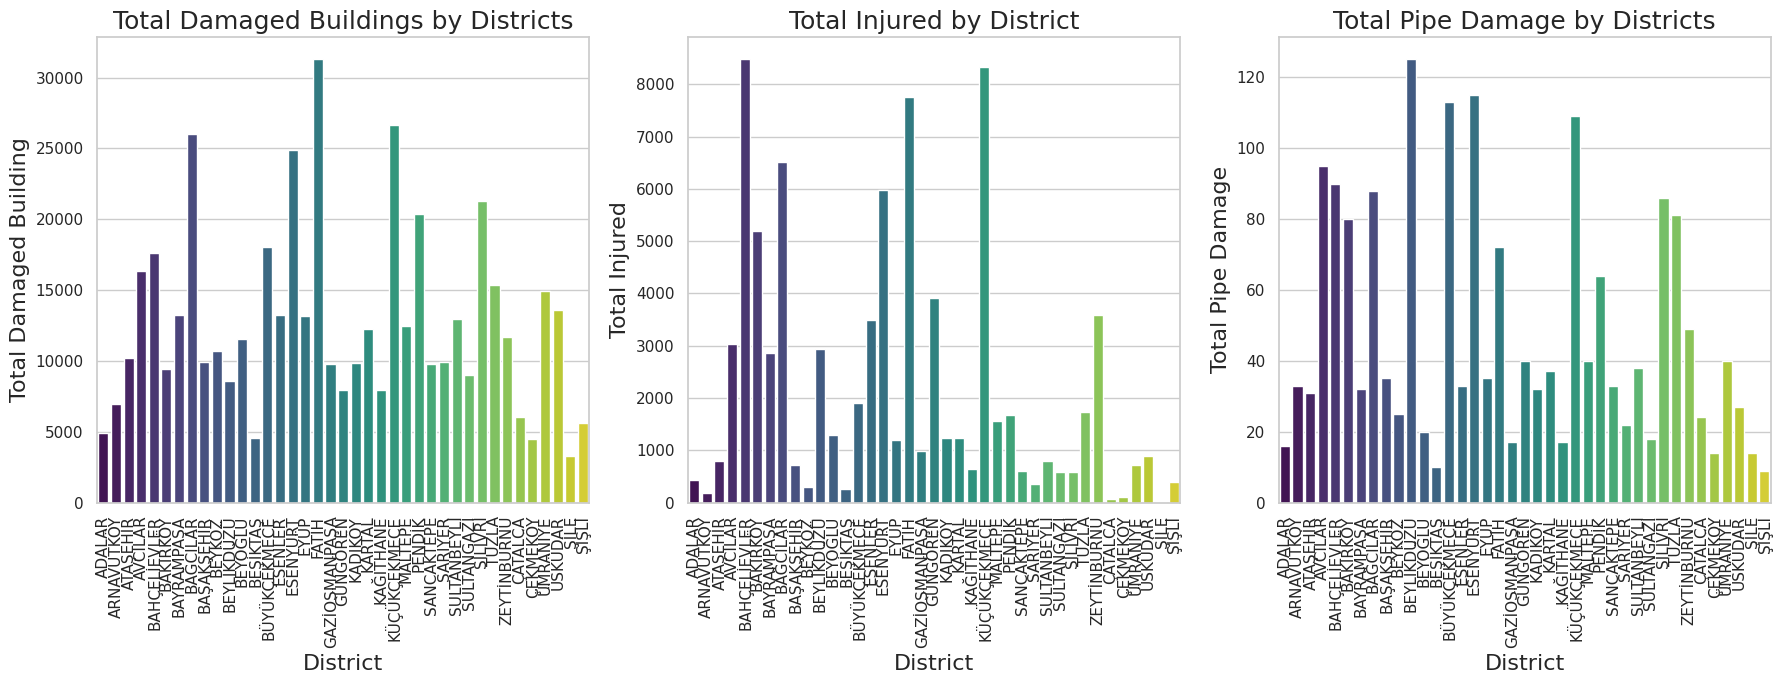

In [ ]:
df_grouped = df.groupby('ilce_adi').agg({
    'toplam_hasarli_bina': 'sum',
    'toplam_yarali': 'sum',
    'toplam_boru_hasari': 'sum'
}).reset_index()

plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='ilce_adi', y='toplam_hasarli_bina', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Damaged Building", fontsize=16)
plt.title('Total Damaged Buildings by Districts', fontsize=18)

plt.subplot(1, 3, 2)
sns.barplot(x='ilce_adi', y='toplam_yarali', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Injured", fontsize=16)
plt.title('Total Injured by District', fontsize=18)

plt.subplot(1, 3, 3)
sns.barplot(x='ilce_adi', y='toplam_boru_hasari', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Pipe Damage", fontsize=16)
plt.title('Total Pipe Damage by Districts', fontsize=18)

plt.tight_layout()
plt.show()

#Creates and displays three bar charts showing total damaged buildings, total injured and total pipe damage by district

In [ ]:
import geopandas as gpd
import folium
from folium import Choropleth
import pandas as pd

# JSON dosyasını Pandas ile okuma
json_url = 'https://raw.githubusercontent.com/alicangnll/ibb-istanbul-depremi-tahmini-2021/main/ilce.json'
json_data = pd.read_json(json_url)

# Verinin ilk birkaç satırını inceleme
print(json_data.head())




import geopandas as gpd
from shapely.geometry import Point

# GeoDataFrame oluşturmak için
gdf = gpd.GeoDataFrame(
    json_data,
    geometry=json_data.apply(lambda row: Point(row['lon'], row['lat']), axis=1),
    crs="EPSG:4326"  # EPSG kodu coğrafi sistem için
)

# Verinin ilk birkaç satırını kontrol etme
print(gdf.head())



# İBB verilerini yükleme
ib_data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")
ib_data['risk_level'] = ib_data['life_loss_number']

# İlçelerin adını içeren bir sütun ile birleştirme için
# Burada, 'ilce_adi' sütununu kullanarak birleştirme yapıyoruz
gdf = gdf.merge(ib_data[['province_name', 'risk_level']], left_on='ilce_adi', right_on='province_name', how='left')

# Harita oluşturma
import folium
from folium import Choropleth

# Harita oluşturma
m = folium.Map(location=[41.0082, 28.9784], zoom_start=11)

# Risk seviyelerini harita üzerinde gösterme
Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['ilce_adi', 'risk_level'],
    key_on='feature.properties.ilce_adi',  # Anahtarın doğru olduğundan emin olun
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Risk Seviyesi'
).add_to(m)


# Haritayı kaydetme
m.save('/content/istanbul_risk_haritasi2.html')

from folium import Html

# Create HTML with the map
html = Html("""<iframe src="/content/istanbul_risk_haritasi2.html" width="800" height="600"></iframe>""", script=True)

# Add HTML to the map
m.add_child(html)

# Display the map (might not render perfectly)
m


                    ilce_adi       lat       lon
0           ADALAR,BURGAZADA  40.88113  29.07024
1          ADALAR,HEYBELIADA  40.87682  29.10167
2           ADALAR,KINALIADA  40.90941  29.05241
3               ADALAR,NIZAM  40.87501  29.12913
4  ARNAVUTKÖY,ADNAN MENDERES  41.21245  28.70452
                    ilce_adi       lat       lon                   geometry
0           ADALAR,BURGAZADA  40.88113  29.07024  POINT (29.07024 40.88113)
1          ADALAR,HEYBELIADA  40.87682  29.10167  POINT (29.10167 40.87682)
2           ADALAR,KINALIADA  40.90941  29.05241  POINT (29.05241 40.90941)
3               ADALAR,NIZAM  40.87501  29.12913  POINT (29.12913 40.87501)
4  ARNAVUTKÖY,ADNAN MENDERES  41.21245  28.70452  POINT (28.70452 41.21245)


In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import time
import os

def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    # Load training dataset
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    # Load testing dataset
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    # Calculate weights & biases
    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    # Calculate hidden neuron output matrix H
    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    # Calculate the training accuracy
    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = mean_squared_error(T, Y)
    TrainingR2 = r2_score(T, Y)

    # Calculate the output of testing input
    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = mean_squared_error(TV_T, TY)
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2

# Veri setini yükle
data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Özellikler ve hedef değişkeni ayır
X = data.drop(['province_name', 'neighborhood_name', 'neighborhood_village_uavt', 'life_loss_number', 'waste_water_pipe_damage','drinking_water_pipe_damage','natural gas_pipe_damage'], axis=1)
y = data['life_loss_number']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Hiperparametre optimizasyonu ve farklı aktivasyon fonksiyonları için döngü
activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000, 5000]
c_list = [10, 100, 1000, 10000, 100000, 10**10]

# Sonuçları saklamak için bir liste oluştur
results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            # Verileri CELM'in beklediği formata dönüştür
            train_data = np.column_stack((y_train, X_train))
            test_data = np.column_stack((y_test, X_test))

            # Geçici dosyalar oluştur
            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            # CELM modelini çalıştır
            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            # Sonuçları listeye ekle
            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time (s)': TrainingTime,
                'Test Time (s)': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            # Geçici dosyaları sil
            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

# Sonuçları DataFrame'e dönüştür
results = pd.DataFrame(results_list)

# Sonuçları göster
print(results.to_string(index=False))

# En iyi Test RMSE, Test MAE, Test MSE ve Test R² sonuçlarını bul
best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

print("\nEn iyi Test RMSE:")
print(results[results['Test RMSE'] == best_rmse][['Activation', 'Neurons', 'C', 'Test RMSE']].to_string(index=False))

print("\nEn iyi Test MAE:")
print(results[results['Test MAE'] == best_mae][['Activation', 'Neurons', 'C', 'Test MAE']].to_string(index=False))

print("\nEn iyi Test MSE:")
print(results[results['Test MSE'] == best_mse][['Activation', 'Neurons', 'C', 'Test MSE']].to_string(index=False))

print("\nEn iyi Test R²:")
print(results[results['Test R²'] == best_rkare][['Activation', 'Neurons', 'C', 'Test R²']].to_string(index=False))
# Sonuçları CSV dosyası olarak kaydet
results.to_csv('results.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
import time
import os

def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    # Load training dataset
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    # Load testing dataset
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    # Calculate weights & biases
    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    # Calculate hidden neuron output matrix H
    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    # Calculate the training accuracy
    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = mean_squared_error(T, Y)
    TrainingR2 = r2_score(T, Y)

    # Calculate the output of testing input
    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = mean_squared_error(TV_T, TY)
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2

# Veri setini yükle
data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Özellikler ve hedef değişkeni ayır
X = data.drop(['province_name', 'neighborhood_name', 'neighborhood_village_uavt', 'life_loss_number'], axis=1)
y = data['life_loss_number']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=0.95)  # %95 varyansı koruyan bileşen sayısı
X_pca = pca.fit_transform(X_scaled)
print(f"PCA uygulandı. Yeni özellik sayısı: {X_pca.shape[1]}")

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hiperparametre optimizasyonu ve farklı aktivasyon fonksiyonları için döngü
activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000, 5000]
c_list = [10, 100, 1000, 10000, 100000, 10**10]

# Sonuçları saklamak için bir liste oluştur
results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            # Verileri CELM'in beklediği formata dönüştür
            train_data = np.column_stack((y_train, X_train))
            test_data = np.column_stack((y_test, X_test))

            # Geçici dosyalar oluştur
            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            # CELM modelini çalıştır
            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            # Sonuçları listeye ekle
            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time (s)': TrainingTime,
                'Test Time (s)': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            # Geçici dosyaları sil
            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

# Sonuçları DataFrame'e dönüştür
results = pd.DataFrame(results_list)

# Sonuçları göster
print(results.to_string(index=False))

# En iyi Test RMSE, Test MAE, Test MSE ve Test R² sonuçlarını bul
best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

print("\nEn iyi Test RMSE:")
print(results[results['Test RMSE'] == best_rmse][['Activation', 'Neurons', 'C', 'Test RMSE']].to_string(index=False))

print("\nEn iyi Test MAE:")
print(results[results['Test MAE'] == best_mae][['Activation', 'Neurons', 'C', 'Test MAE']].to_string(index=False))

print("\nEn iyi Test MSE:")
print(results[results['Test MSE'] == best_mse][['Activation', 'Neurons', 'C', 'Test MSE']].to_string(index=False))

print("\nEn iyi Test R²:")
print(results[results['Test R²'] == best_rkare][['Activation', 'Neurons', 'C', 'Test R²']].to_string(index=False))

# Sonuçları CSV dosyası olarak kaydet
results.to_csv('results.csv', index=False)


PCA uygulandı. Yeni özellik sayısı: 4
Activation  Neurons           C  Train Time (s)  Test Time (s)   Train RMSE    Test RMSE    Train MAE    Test MAE    Train MSE     Test MSE  Train R²       Test R²
       sig      100          10        0.002831       0.002226 2.491826e+00     3.461731 1.517643e+00    1.967864 6.209198e+00 1.198358e+01  0.993151  9.772770e-01
       sig      100         100        0.008590       0.000496 1.934132e+00     3.034730 1.146923e+00    1.549009 3.740867e+00 9.209585e+00  0.995874  9.825370e-01
       sig      100        1000        0.014014       0.000480 1.501585e+00     2.883677 9.640193e-01    1.525906 2.254757e+00 8.315594e+00  0.997513  9.842321e-01
       sig      100       10000        0.008968       0.000521 1.318127e+00     3.345542 8.546239e-01    1.605641 1.737459e+00 1.119265e+01  0.998083  9.787767e-01
       sig      100      100000        0.006132       0.000469 1.586457e+00     4.064284 1.010921e+00    1.764000 2.516845e+00 1.651840e+01  0

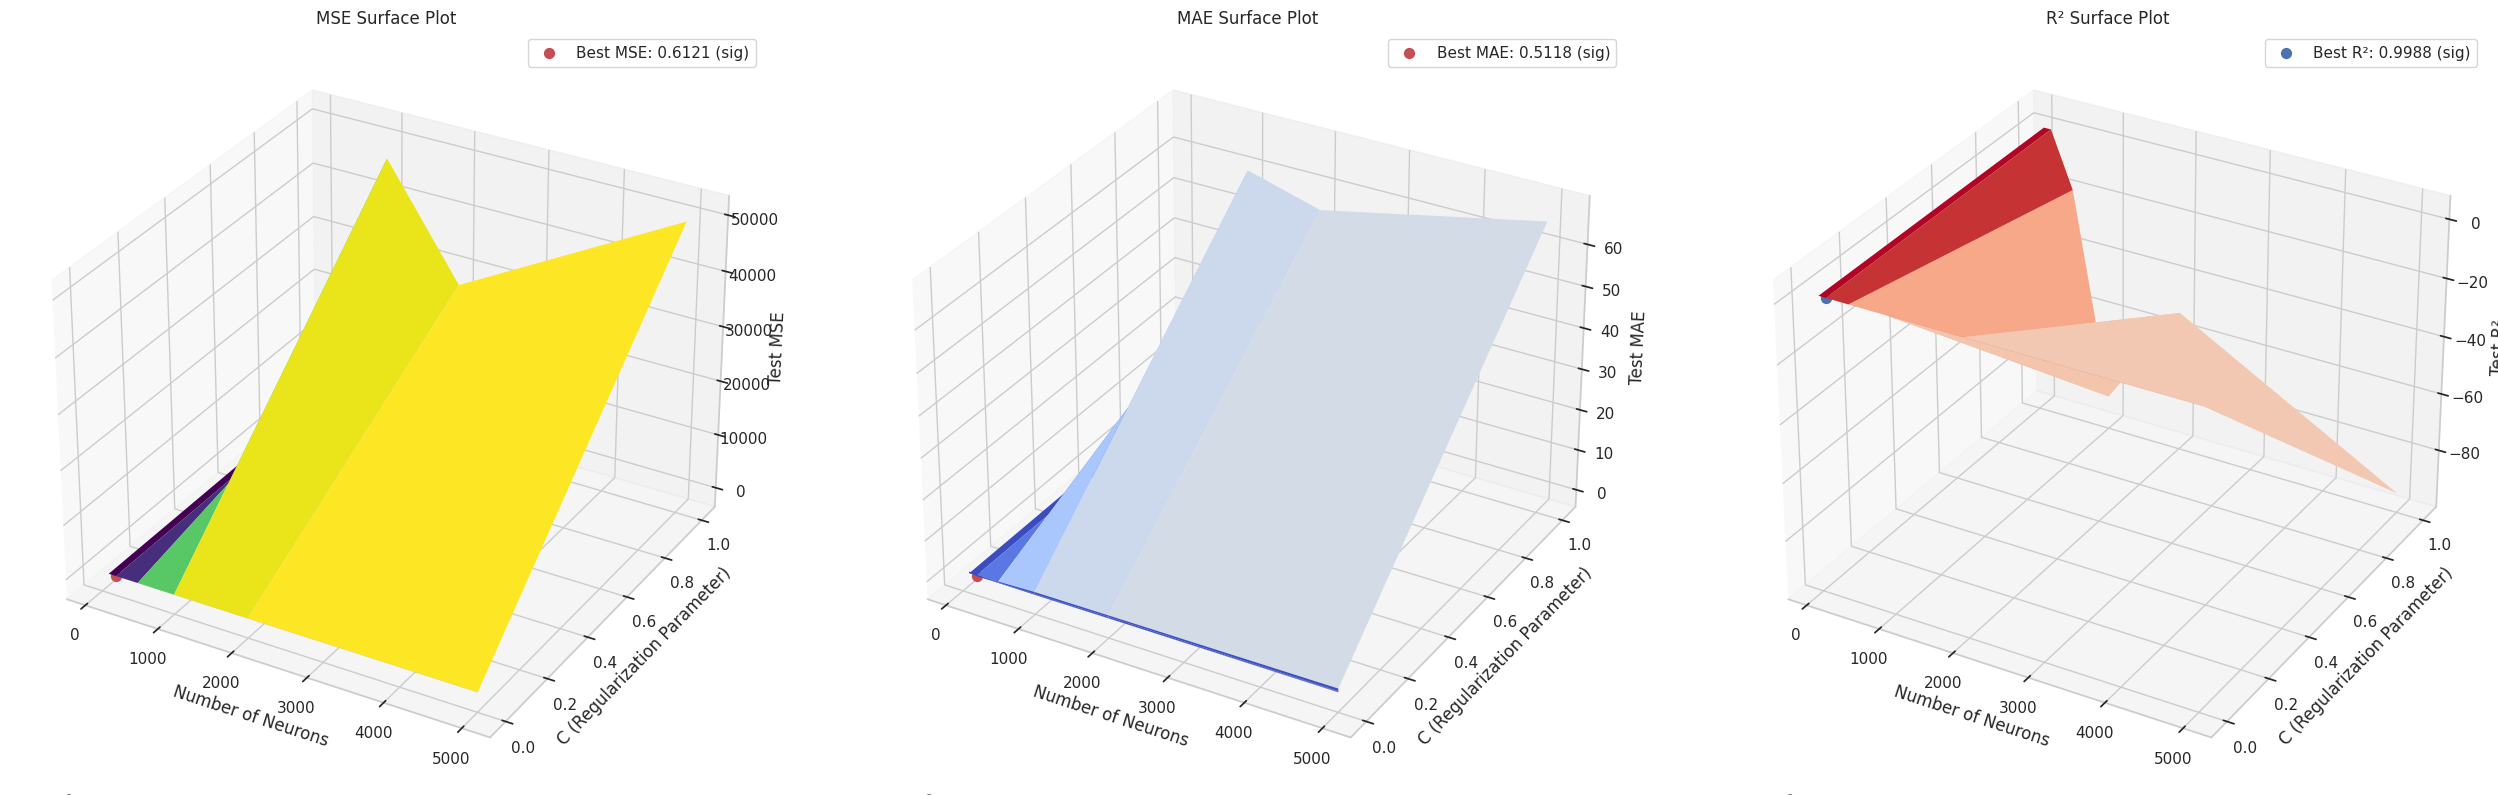

In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import time
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    # Load training dataset
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    # Load testing dataset
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    # Calculate weights & biases
    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    # Calculate hidden neuron output matrix H
    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    # Calculate the training accuracy
    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = np.mean(np.square(T - Y))
    TrainingR2 = r2_score(T, Y)

    # Calculate the output of testing input
    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = np.mean(np.square(TV_T - TY))
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2

# Veri setini yükle
data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Özellikler ve hedef değişkeni ayır shap ile işe yaramayan featureları drop et
## X = data.drop(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt', 'can_kaybi_sayisi'], axis=1)
# Özellikler ve hedef değişkeni ayır
X = data.drop(['province_name', 'neighborhood_name', 'neighborhood_village_uavt', 'life_loss_number', 'waste_water_pipe_damage','drinking_water_pipe_damage','natural gas_pipe_damage'], axis=1)
y = data['life_loss_number']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hiperparametre optimizasyonu ve farklı aktivasyon fonksiyonları için döngü
activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000, 5000]
c_list = [10, 100, 1000, 10000, 100000, 10**10]

# Sonuçları saklamak için bir liste oluştur
results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            # Verileri CELM'in beklediği formata dönüştür
            train_data = np.column_stack((y_train, X_train))
            test_data = np.column_stack((y_test, X_test))

            # Geçici dosyalar oluştur
            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            # CELM modelini çalıştır
            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            # Sonuçları listeye ekle
            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time': TrainingTime,
                'Test Time': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            # Geçici dosyaları sil
            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

# Sonuçları DataFrame'e dönüştür
results = pd.DataFrame(results_list)

# En iyi Test RMSE, Test MAE ve Test R² sonuçlarını bul
best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

# En iyi sonuçları seç
best_rmse_row = results[results['Test RMSE'] == best_rmse]
best_mae_row = results[results['Test MAE'] == best_mae]
best_mse_row = results[results['Test MSE'] == best_mse]
best_r2_row = results[results['Test R²'] == best_rkare]

# En iyi aktivasyon fonksiyonlarını bul
best_rmse_activation = best_rmse_row['Activation'].values[0]
best_mae_activation = best_mae_row['Activation'].values[0]
best_mse_activation = best_mse_row['Activation'].values[0]
best_r2_activation = best_r2_row['Activation'].values[0]

# En iyi değerlerin koordinatlarını belirle
best_rmse_coords = (best_rmse_row['Neurons'].values[0], best_rmse_row['C'].values[0])
best_mae_coords = (best_mae_row['Neurons'].values[0], best_mae_row['C'].values[0])
best_mse_coords = (best_mse_row['Neurons'].values[0], best_mse_row['C'].values[0])
best_r2_coords = (best_r2_row['Neurons'].values[0], best_r2_row['C'].values[0])

# Meshgrid oluştur
neurons_list = np.array(neurons_list)
c_list = np.array(c_list)
N, C = np.meshgrid(neurons_list, c_list)

# RMSE, MAE, MSE ve R² Matrislerini Doldur
RMSE = np.zeros((len(c_list), len(neurons_list)))
MAE = np.zeros((len(c_list), len(neurons_list)))
MSE = np.zeros((len(c_list), len(neurons_list)))
R2 = np.zeros((len(c_list), len(neurons_list)))

for idx, c in enumerate(c_list):
    for jdx, neurons in enumerate(neurons_list):
        filtered_result = results[(results['Neurons'] == neurons) & (results['C'] == c)]
        if not filtered_result.empty:
            RMSE[idx, jdx] = filtered_result['Test RMSE'].values[0]
            MAE[idx, jdx] = filtered_result['Test MAE'].values[0]
            MSE[idx, jdx] = filtered_result['Test MSE'].values[0]
            R2[idx, jdx] = filtered_result['Test R²'].values[0]
        else:
            RMSE[idx, jdx] = np.nan
            MAE[idx, jdx] = np.nan
            MSE[idx, jdx] = np.nan
            R2[idx, jdx] = np.nan

# Grafiklerin oluşturulması
fig = plt.figure(figsize=(26, 8))


# MSE Plot
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(N, C, MSE, cmap='viridis', edgecolor='none')
ax1.scatter(best_mse_coords[0], best_mse_coords[1], best_mse, color='r', s=50,
            label=f'Best MSE: {best_mse:.4f} ({best_mse_activation})')
ax1.set_xlabel('Number of Neurons')
ax1.set_ylabel('C (Regularization Parameter)')
ax1.set_zlabel('Test MSE')
ax1.set_title('MSE Surface Plot')
ax1.legend()

# RMSE Plot
##ax2 = fig.add_subplot(142, projection='3d')
##surf2 = ax2.plot_surface(N, C, RMSE, cmap='coolwarm', edgecolor='none', vmin=RMSE.min(), vmax=RMSE.max())
##ax2.scatter(best_rmse_coords[0], best_rmse_coords[1], best_rmse, color='r', s=50,
##            label=f'Best RMSE: {best_rmse:.4f} ({best_rmse_activation})')
##ax2.set_xlabel('Number of Neurons')
##ax2.set_ylabel('C (Regularization Parameter)')
##ax2.set_zlabel('Test RMSE')
##ax2.set_title('RMSE Surface Plot')
##ax2.legend()

# MAE Plot
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(N, C, MAE, cmap='coolwarm', edgecolor='none', vmin=MAE.min(), vmax=MAE.max())
ax2.scatter(best_mae_coords[0], best_mae_coords[1], best_mae, color='r', s=50,
            label=f'Best MAE: {best_mae:.4f} ({best_mae_activation})')
ax2.set_xlabel('Number of Neurons')
ax2.set_ylabel('C (Regularization Parameter)')
ax2.set_zlabel('Test MAE')
ax2.set_title('MAE Surface Plot')
ax2.legend()



# R² Plot
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(N, C, R2, cmap='coolwarm', edgecolor='none', vmin=R2.min(), vmax=R2.max())
ax3.scatter(best_r2_coords[0], best_r2_coords[1], best_rkare, color='b', s=50,
            label=f'Best R²: {best_rkare:.4f} ({best_r2_activation})')
ax3.set_xlabel('Number of Neurons')
ax3.set_ylabel('C (Regularization Parameter)')
ax3.set_zlabel('Test R²')
ax3.set_title('R² Surface Plot')
ax3.legend()

plt.tight_layout()
plt.show()
